In [1]:
import numpy as np
import math, random
import matplotlib.pyplot as plt
np.random.seed(0)

In [4]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [65]:
def generateSine(t,sr,f,phi):
    t = np.linspace(0,t,sr*t)
    return np.sin(2*np.pi*f*t+phi)

def addNoise(x,noise_range=(-1,1)):
    return x+np.random.uniform(noise_range[0],noise_range[1],x.shape[0])

def generateSineWithNoise(t,sr,f,phi, noise_range=(-1,1)):
    x = generateSine(t,sr,f,phi)
    return x, x+np.random.uniform(noise_range[0],noise_range[1],x.shape[0])

In [66]:
def generateDataset(t, sr, n_samples):
    data_in = np.zeros((n_samples, t*sr))
    data_out = np.zeros((n_samples, t*sr))
    
    for i in range(n_samples):
        # the phi (Phase) and the f (frequency) should be variable so that 
        # we can generate different signal. These signals are of same length
        f = np.random.uniform(1,10);
        phi = np.random.uniform(0,np.pi)
        data_in[i,:], data_out[i,:] = generateSineWithNoise(t,sr,f,phi, noise_range=(-1,1))
    return data_in, data_out
    

In [67]:
data_in, data_out = generateDataset(1,100,10000)
train_inp, train_out = data_in[:8000], data_out[:8000]
test_inp, test_out = data_in[8000:], data_out[8000:]

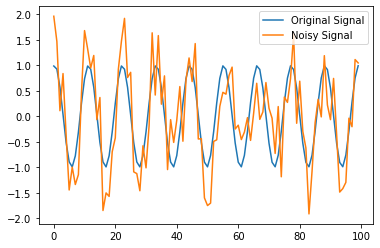

In [69]:
plt.plot(data_in[0], label='Original Signal')
plt.plot(data_out[0], label='Noisy Signal')
plt.legend()

In [58]:
input_dim = 1
hidden_size = 30
num_layers = 1

class CustomRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomRNN, self).__init__()
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size, )
        self.act = nn.Tanh()
    def forward(self, x):
        pred, hidden = self.rnn(x, None)
        pred = self.act(self.linear(pred)).view(pred.data.shape[0], -1, 1)
        return pred

r= CustomRNN(input_dim, hidden_size, 1)

In [70]:
# Storing predictions per iterations to visualise later
predictions = []

optimizer = torch.optim.Adam(r.parameters(), lr=1e-2)
loss_func = nn.L1Loss()

for t in range(301):
    hidden = None
    inp = Variable(torch.Tensor(train_out.reshape((train_inp.shape[0], -1, 1))), requires_grad=True)
    out = Variable(torch.Tensor(train_inp.reshape((train_out.shape[0], -1, 1))) )
    pred = r(inp)
    optimizer.zero_grad()
    predictions.append(pred.data.numpy())
    loss = loss_func(pred, out)
    if t%20==0:
        print(t, loss.item())
    loss.backward()
    optimizer.step()

0 0.3684008717536926
20 0.24127013981342316
40 0.22130277752876282
60 0.21449601650238037
80 0.2087382972240448
100 0.20171520113945007
120 0.20563745498657227
140 0.20806461572647095
160 0.1971103698015213
180 0.22417327761650085
200 0.20510278642177582
220 0.19664366543293
240 0.19329431653022766
260 0.19183418154716492
280 0.31362980604171753
300 0.26786208152770996


In [71]:
t_inp = Variable(torch.Tensor(test_inp.reshape((test_out.shape[0], -1, 1))), requires_grad=True)
pred_t = r(t_inp)
# Test loss
print(loss_func(pred_t, Variable(torch.Tensor(test_out.reshape((test_inp.shape[0], -1, 1))))).item())

0.5184668302536011


Text(0.5, 1.0, 'Sample num: 10')

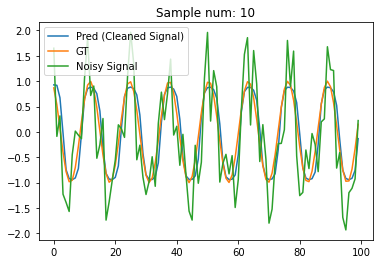

In [73]:
sample_num = 10
plt.plot(pred_t[sample_num].data.numpy(), label='Pred (Cleaned Signal)')
plt.plot(test_inp[sample_num], label='GT')
plt.plot(test_out[sample_num], label='Noisy Signal')
plt.legend()
plt.title("Sample num: {}".format(sample_num))

In [101]:
m = nn.Linear(20, 30)
input = torch.randn(45,20)
output = m(input)

In [104]:
m.weight.shape

torch.Size([30, 20])

In [106]:
m.bias.shape

torch.Size([30])

In [103]:
output.shape

torch.Size([45, 30])